# Welcome to Statistics for Hackers Code Lab!

This series of codelabs aims to bridge your statistics and programming knowledge.

In [1]:
import numpy as np
from func import *

/home/elvyna/miniconda3/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Probability

If you have heard about probability, then I assume you have heard the legend of a coin toss. Let me give you one example question about coin toss

> You toss a coin *30 times* and see *22 heads*. Is it a fair coin?

Fair coin? Ah, you mean the probability of getting heads and tails is same, right? So, if the coin was tossed **30 times** we would expect it to show 15 heads and 15 tails. Therefore, the reasonable conclusion is that *it is not a fair coin*.

![Wait there's more](https://4.bp.blogspot.com/-_p6FcOxcF40/V4qMIqJ-lgI/AAAAAAAAd5k/oLd3oWLoz9MnGc5jvrK82yhpPe378J3RQCLcB/s1600/65139254.jpg)

There's one more question:

> Would it be possible to get 22 heads by chance?

## Simulation

Since we are a *hacker*, we can do this by doing the things we love the most: by simulation!

<img src="https://media.giphy.com/media/QbumCX9HFFDQA/giphy.gif" alt="Hackerman" style="width: 400px;"/>

Let's start with this algorithm for the simulation

```
repeat N times
    x <- draw 30 random sample of binaries (0, 1)
    distribution.insert(compute sum of x)
draw plot: yaxis is the frequency, xaxis is the sum of x
```


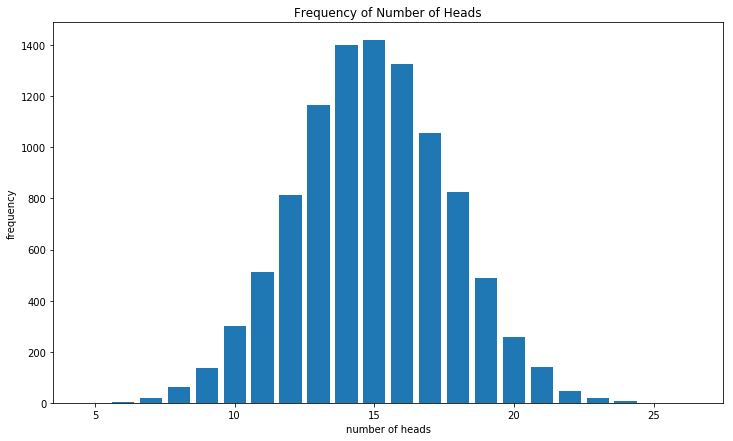

In [2]:
np.random.seed(100)
N = 10000
sample_size = 30
distribution = np.zeros(N)

for n in range(N):
    x = np.random.randint(2, size=sample_size)
    distribution[n] = x.sum()

# visualize
unique, counts = np.unique(distribution, return_counts=True)
draw_bar_plot_heads_counts(unique, counts)

How to convert that into probability? Easy! We should divide all the frequency by the number of experiments we did $(N = 10000)$!

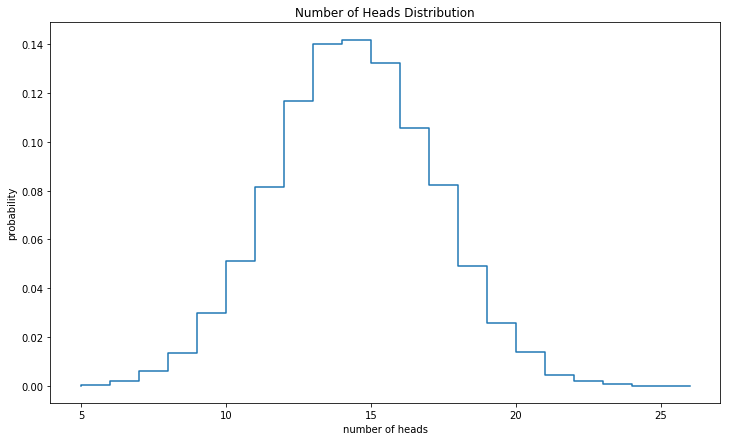

In [3]:
probabilities = counts / N

# visualize
draw_step_plot_head_probabilities(unique, probabilities)

Okay we have done a simulation that shows:

> If we repeatedly do the 30 times toss, what would the number of heads be?

It turns out the answer is not always 15! It could be 10, 20, or even 25! 

Now, back to our question:

> Would it be possible to get 22 heads by chance?

To answer this, we need to see what is the probability to get 22 heads, visually.

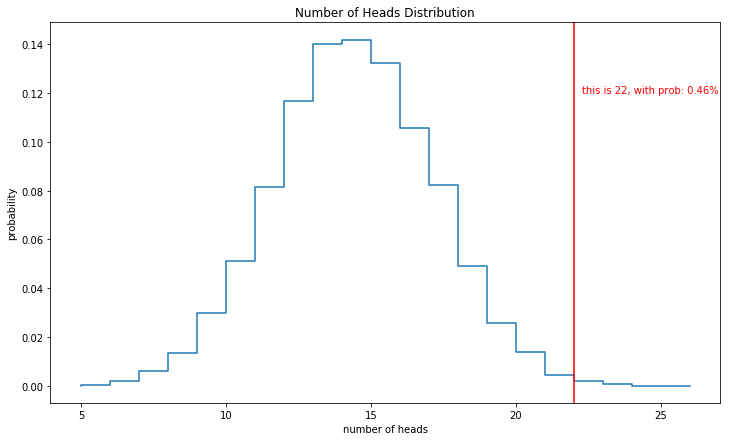

In [4]:
what_we_get = 22
# probability_of_what_we_get = probabilities[what_we_get - 1] # -1 because index start from 0
probability_of_what_we_get = probabilities[unique == what_we_get][0]

draw_step_plot_head_probabilities(unique, probabilities, what_we_get, probability_of_what_we_get)

It turns out this simulation shows that we do get 22 by chance (small chance)! We almost made a wrong decision about the coin and unfairly judge that the coin is unfair!